# Project3 : 타이타닉 데이터 분석

## 1. 데이터셋
+ seaborn에서는 titanic에 대한 데이터를 제공함.
+ RMS 타이타닉은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선으로, 1921년 4월 10일 첫 출항함. 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 중에 4월 15일 빙산과 충돌하여 침몰하였으며, 이로 인해 1,514명이 사망한 것으로 알려져 있음.
+ 타이타닉 데이터를 분석하여 생존에 영향을 준 요인을 파악하고, 이를 바탕으로 생존 여부를 예측하는 모델을 학습시키고자 함.

<br>


## 2. 데이터 확인 및 전처리


In [1]:
# 라이브러리 불러오기 - 데이터 분석 및 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 라이브러리 불러오기 - 모델링
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 스타일 설정
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [68]:
# 데이터 불러오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
# 데이터 확인 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


+ seaborn 라이브러리에서 제공하는 titanic 데이터 사용 
  + survived: 생존 여부(0, 1)
  + pclass: 객실 등급(1, 2, 3)
  + sex: 성별
  + age: 나이
  + sibsp: 함께 탑승한 형제자매, 배우자 수
  + parch: 함께 탑승한 부모, 자식 수
  + fare: 요금
  + embarked: 탑승 항구(S, C, Q)
  + class: 객실 등급(First, Second, Third)
  + who: 사람 구분(man, woman, child)
  + adult_male: 성인 남자 여부(True, False)
  + deck: 갑판
  + embark_town: 탑승 항구(Southhampton, Cherbourg, Queenstown)
  + alive: 생존여부(no, yes)
  + alone: 1인 탑승 여부(True, False)

In [70]:
# 데이터 전처리(1) : 의미가 중복되는 변수 삭제하기
titanic.drop(['class', 'embark_town', 'alive', 'adult_male'], axis=1, inplace=True)

In [71]:
# 데이터 전처리(2) : 결측값 확인
# 결측값은 age, embarked, deck에서 있는 것으로 나타남
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
alone         0
dtype: int64

In [72]:
# 데이터 전처리 : 결측값 처리
# age - 전체 데이터의 평균 나이로 채우기
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
# deck - 결측치 너무 많음 -> 제거
titanic.drop('deck', axis=1, inplace=True, errors='ignore')
# Embarked - 최빈값으로 채우기
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [73]:
# 범주형 데이터 변환
# 범주형 변수들을 원-핫 인코딩으로 변환
sex = pd.get_dummies(titanic['sex'], drop_first=True, dtype=int)
embark = pd.get_dummies(titanic['embarked'], drop_first=True, dtype=int)

# 기존의 범주형 열과 불필요한 열 제거
titanic.drop(['sex', 'embarked', 'who'], axis=1, inplace=True)

# 변환된 수치형 데이터프레임과 기존 데이터프레임 병합
titanic = pd.concat([titanic, sex, embark], axis=1)

titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,False,1,0,1
1,1,1,38.0,1,0,71.2833,False,0,0,0
2,1,3,26.0,0,0,7.9250,True,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,1,0,1


<br>

## 3. 학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 7:3 비율로 분할함

In [74]:
# 학습/평가 데이터 분할 (7:3비율)
X = titanic.drop('survived', axis=1)   # feature
y = titanic['survived']               # target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<br>

## 4. 데이터 탐색

In [75]:
# 요약 통계량 확인
X_train.describe()

,pclass,age,sibsp,parch,fare,male,Q,S
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.341894,29.344479,0.576244,0.386838,31.840730,0.658106,0.088283,0.735152
std,0.819945,13.028013,1.216267,0.807692,51.027372,0.474725,0.283933,0.441607
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,30.750000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


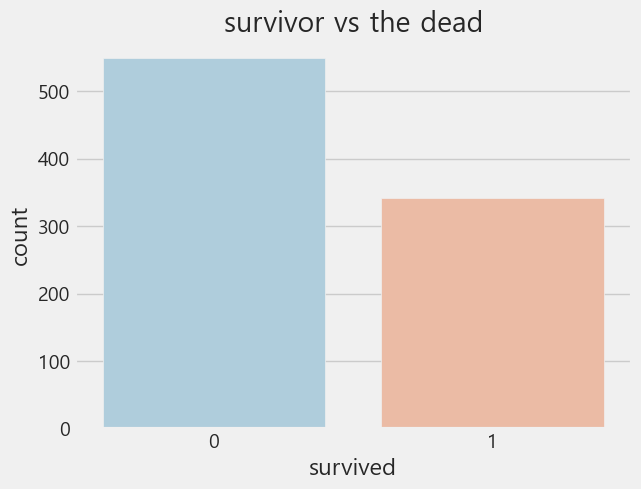

In [87]:
# 생존 여부에 따른 승객 수
sns.countplot(x='survived', data=titanic, hue='survived', palette='RdBu_r', legend=False)
plt.title('survivor vs the dead')
plt.show()

+ 사망자가 생존자보다 많음

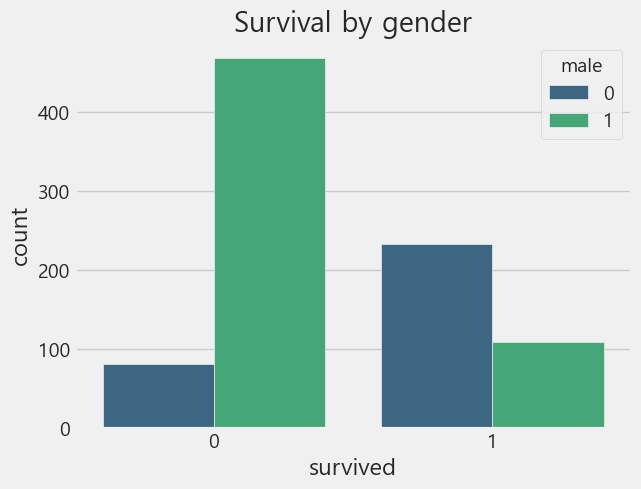

In [88]:
# 성별에 따른 생존율
sns.countplot(x='survived', hue='male', data=titanic, palette='viridis')
plt.title('Survival by gender')
plt.show()

+ 남성이 여성보다 생존하지 못한 비율이 더 높음

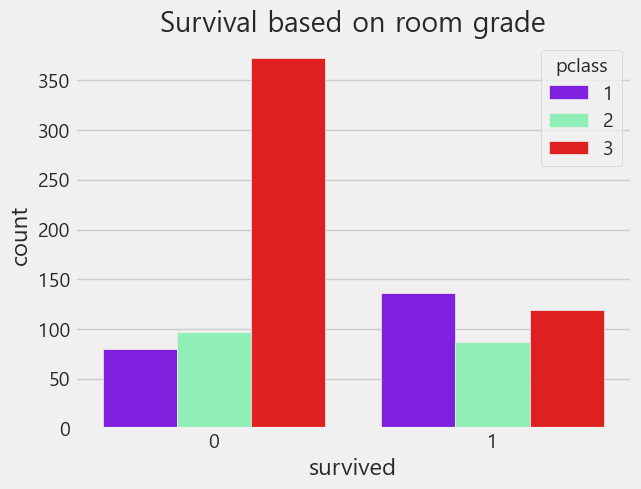

In [82]:
# 객실 등급에 따른 생존율
sns.countplot(x='survived', hue='pclass', data=titanic, palette='rainbow')
plt.title('Survival based on room grade')
plt.show()

+ 3등급 승객의 사망률이 가장 높고, 1등급 승객의 생존률이 가장 높음.
+ 즉, 객실 등급이 높을수록 생존 가능성이 높은 것을 확인할 수 있음.

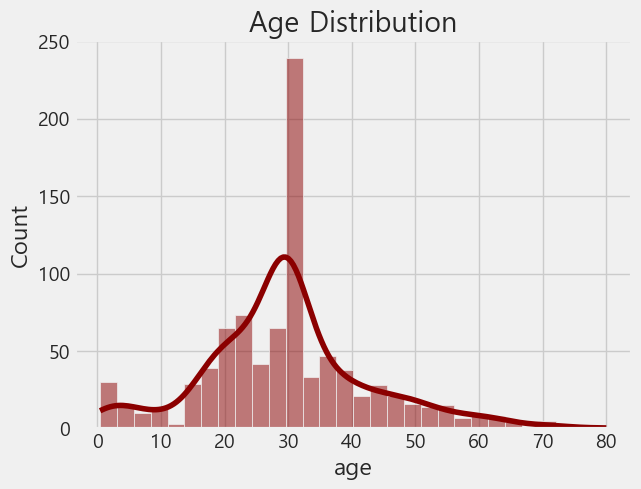

In [83]:
# 나이 분포
sns.histplot(titanic['age'].dropna(), kde=True, bins=30, color='darkred')
plt.title('Age Distribution')
plt.show()

+ 타이타닉 탑승객의 나이는 20~30대에 가장 많으며, 대체로 젊은 층이 많았음.

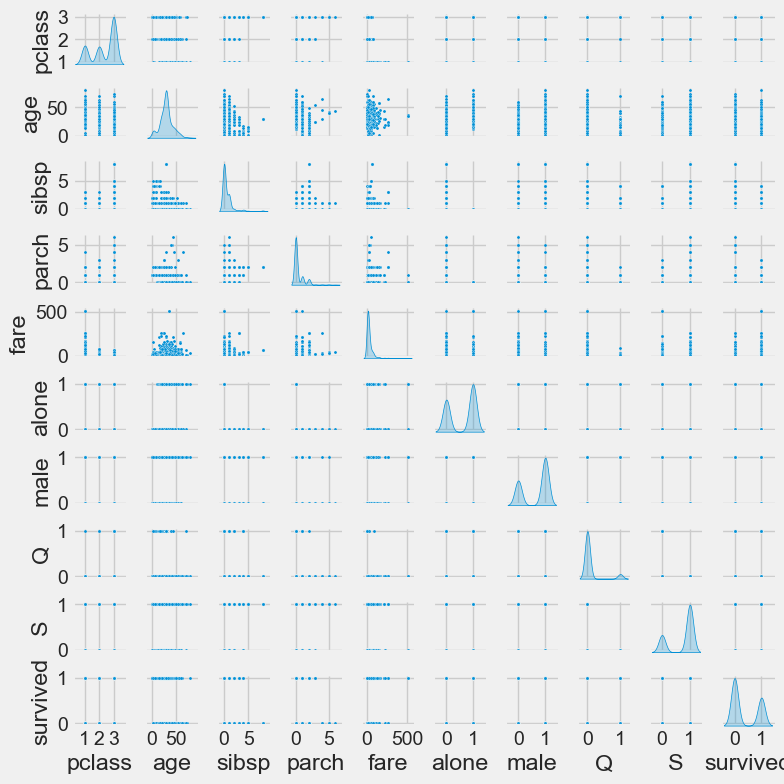

In [56]:
# 산점도
sns.pairplot(df_train, height=0.8, plot_kws={'s':5}, diag_kind='kde')
plt.show()

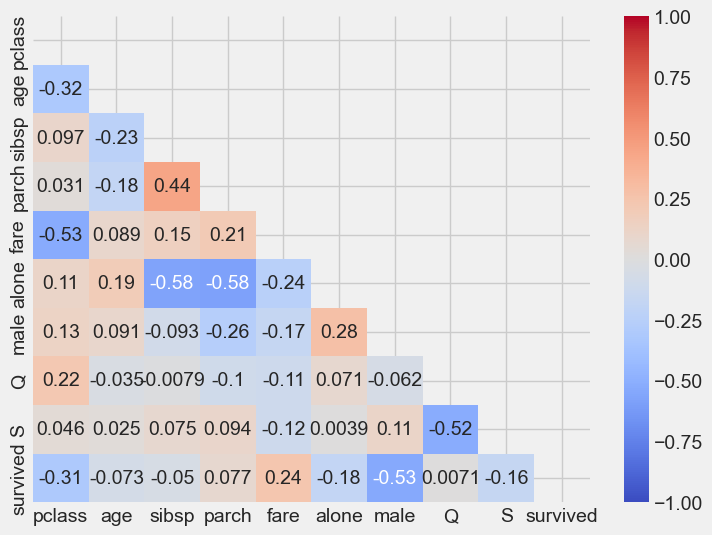

In [57]:
# 상관계수
corr_train=df_train.corr()
upp_mat = np.triu(corr_train)

plt.figure(figsize=(8,6))
sns.heatmap(corr_train, annot=True, mask=upp_mat, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

+ 생존 여부(survived)는 성별(male)과 -0.53의 비교적 강한 음의 상관관계를 가지며, 이는 여성 승객의 생존률이 높았음을 의미함.
+ 사회적 지위(pclass)는 -0.31, 운임(fare)은 0.24로 생존 여부(survived)과의 유의미한 상관관계를 보임.
+ alone, age, sibsp, parch 등은 생존 여부(survived)와 약한 수준의 상관관계를 보임.
+ 따라서 생존 여부(survived)를 예측하는 특성(feature)으로 해당 변수를 선택함.

<br>

## 5. 분류모델 학습 및 평가

In [99]:
a = [1,2]
a

[1, 2]

In [100]:
a.append(10)
a

[1, 2, 10]

In [105]:
# 최적의 k 값 선택 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 20, 2)  # 홀수 k값 탐색
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일 때 정확도: {scores.mean():.3f}')

k=1일 때 정확도: 0.679
k=3일 때 정확도: 0.695
k=5일 때 정확도: 0.699
k=7일 때 정확도: 0.691
k=9일 때 정확도: 0.691
k=11일 때 정확도: 0.686
k=13일 때 정확도: 0.695
k=15일 때 정확도: 0.689
k=17일 때 정확도: 0.696
k=19일 때 정확도: 0.700


In [104]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 19이며, 평균 정확도는 0.700


In [108]:
#  K-NN 분류 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# train과 test 컬럼 맞추기
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 학습 데이터로 학습한 분류모델에 평가 데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)

# 분류 모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {precision:.3f}") 
print(f"재현율 : {recall:.3f}")

정확도 : 0.743
정밀도 : 0.756
재현율 : 0.559


+ 정확도는 0.743으로, 모델이 타이타닉 생존 여부를 약 74.3%의 비율로 올바르게 예측함을 의미함.
+ 정밀도는 0.756으로, 생존으로 예측한 승객 중 약 75.6%가 실제로 생존했음을 나타냄.
+ 재현율은 0.559로, 실제 생존자 중 약 55.9%만을 모델이 정확히 찾아냈음을 시사함.
+ 따라서 재현율이 낮아 놓치는 생존자가 비교적 많아 모델의 성능 개선이 필요한 상황임.